<a name="cell-TOC-opt"></a>

### 8. [ Newton's Method Review and re-examination: The Sandwich Estimator](#cell-opt-fx-sandwich)

1. [Fisher Scoring](#cell-opt-fx-fisher)
2. [Iteratively Reweighted Least Squares (IRLS): The Logistic Regression Example](#cell-opt-fx-irls) 
   (`STA410_W24_Week8_Homework_LogisticRegressionIRLS.ipynb`)
3. [M Estimation](#cell-opt-fx-m-est)
    1. [Huber Loss](#cell-opt-fx-huber) 
       (`STA410_W24_Week8_Extra_HuberLossIRLS.ipynb`)
4. [Quasi-Likelihoods](#cell-opt-fx-quasi)
      

<!--
    1. ~Combinatorial (Discrete) Optimzation~
      - ~Simulated Annealing~
    2. ~Constrained optimization~
      - ~Expectation-Maximization~
      - ~Interior and Exterior Point Algorithms~
-->

<a name="cell-opt-fx-sandwich"></a>
# 8. Newton's Method Review and re-examination:<br>The Sandwich Estimator ([Return to TOC](#cell-TOC-opt)) 
---

The ***log likelihood***  $g(\theta) = \log f(x|\theta) = \sum_{i=1}^n \log f(x_i|\theta) = \sum_{i=1}^n g_i(\theta)$ maximization by ***Newton's Method*** is

\begin{align*}
\theta^{(t+1)} & = {} \theta^{(t)} - \frac{g'(\theta^{(t)})}{g''(\theta^{(t)})} = \theta^{(t)} -  \frac{ \sum_{i=1}^n  g_i'(\theta^{(t)})}{ \sum_{i=1}^n  g_i''(\theta^{(t)})} \\ 
& = {} \sum_{i=1}^n \frac{g_i''(\theta^{(t)})}{\sum_{j=1}^n g_j''(\theta^{(t)})} \left( \theta^{(t)} - \frac{g_i'(\theta^{(t)})}{g_i''(\theta^{(t)})} \right) = \sum_{i=1}^n w_j\left( \theta^{(t)} - \frac{g_i'(\theta^{(t)})}{g_i''(\theta^{(t)})} \right) 
\end{align*}

which is a weighted average; so, at convergence the variance of the pseudo sample $\left\{\theta^{*} + \frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}: i=1,\cdots,n \right\}$$\require{cancel}$ is 

\begin{align*}
\hat \sigma^2 & = {} \sum_{i=1}^n \frac{g_i''(\theta^{*})^2}{\left(\sum_{j=1}^n g_j''(\theta^{*})\right)^2 } \left(\theta^{*} - \frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}  - \cancel{\text{E}\left[\theta^{*} - \frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}\right]}^{\theta^{*}}\right)^2\\
& = {}  \sum_{i=1}^n \frac{g_i''(\theta^{*})^2}{\left(\sum_{j=1}^n g_j''(\theta^{*})\right)^2 } \left(\frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}\right)^2 = \frac{ \sum_{i=1}^n g_i'(\theta^{*})^2}{\left(\sum_{j=1}^n g_j''(\theta^{(t)})\right)^2 }
\end{align*}

which is the so-called ***sandwich estimate*** of the variance of the estimate $\theta^*$

<!-- *Uncertainty estimation can be facilitated by ***Newton's method***.* -->



<a name="cell-opt-fx-fisher"></a>

## 8.1 Fisher Scoring ([Return to TOC](#cell-TOC-opt)) 

---

In the MLE context where $g(x) \equiv l(\theta)$ the [Fisher information](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) $I(\theta) = {E[\nabla_\theta l(\theta)\nabla_\theta l(\theta)^T]} = E[ {{-\underbrace{H_{l(\theta)}(\theta)}_{J(\nabla_\theta l(\theta))(\theta)}}}]$ 
suggests the ***Fisher scoring*** variant on ***Newton's method*** 

$$\begin{align*}
\theta^{(t+1)}  & {} = \theta^{(t)} - \left[H_{l(\theta)}(\theta^{(t)})\right]^{-1}\nabla_\theta l(\theta^{(t)}) \approx \theta^{(t)} + {I(\theta^{(t)})}{}^{-1}\nabla_\theta l(\theta^{(t)}) \approx \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1}\nabla_\theta l(\theta^{(t)}) \\
& {} = \theta^{(t)} + \left[\sum_{i=1}^n \nabla_\theta log f(x_i|\theta)\big|_{\theta^{(t)}}\left(\nabla_\theta log f(x_i| \theta)\big|_{\theta^{(t)}}\right)^T \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\\\
& {} \approx \theta^{(t)} - H_{l(\theta)}(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)})  = \theta^{(t)} - J(\nabla_\theta l)(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)}) \\
& {} = \theta^{(t)} - \left[\sum_{i=1}^n J( \nabla_\theta log f(x_i|\theta))\big|_{\theta^{(t)}} \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta log f(x_i|\theta)\big|_{\theta^{(t)}}\right]
\end{align*}$$

approximating ***expected*** information (i.e., the negative Hessian) with ***observed*** information

<!--

$$\begin{align*}
  M = -I(\theta^{(t)}) = {} & -E[\nabla_\theta l(\theta^{(t)})\nabla_\theta l(\theta^{(t)})^T] = E[H_{l(\theta)}l(\theta^{(t)})]\\
  \approx {} & -\sum_{i=1}^n \nabla_\theta log f_{x_i}(\theta^{(t)})\left(\nabla_\theta log f_{x_i}(\theta^{(t)})\right)^T \approx  H_{l(\theta)}l(\theta^{(t)}) 
  \end{align*}$$



> ***Fisher information*** $I(\theta^{(t)})$ is [***positive semi-definite***](https://stats.stackexchange.com/questions/49942/why-is-the-fisher-information-matrix-positive-semidefinite), so for some small step size factor $\alpha^{(t)}>0$
   > - the update $\theta^{(t+1)} = \theta^{(t)} + \underbrace{\alpha^{(t)}[I(\theta^{(t)})]^{-1}\nabla_\theta l(\theta^{(t)})}_{\text{will have the same sign as }\nabla_\theta g(\theta^{(t)})}$ 
   > - guarantees that $f(x^{(t+1)}) > f(x^{(t)})$
   >
   > and at a (local) maximum $\theta^*$ where $\nabla_\theta l(\theta^*)=0$, both $H_{l(\theta)}(\theta^*)$ and $E[H_{l(\theta)}(\theta^*)] = -I(\theta^*)$ will be ***negative semi-definite***.

-->

<a name="cell-opt-fx-irls"></a>
## 8.2 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example ([Return to TOC](#cell-TOC-opt)) 
---

In ***exponential family*** form the ***log likelihood*** of the ***logistic regression*** (***generalized linear model***) is
<br><br>

$$l(\beta) = \overbrace{y^t Z\beta - \mathbf{1}^T \underbrace{\log \left(1 + \exp(Z\beta) \right)}_{g(Z\beta)}}^{\log f(y|\theta) \;= \;[y\theta - b(\theta)]/a(\phi)+c(y,\phi)}$$

where $\Pr(y_i=1) = \underset{\text{a property of the exponential family}}{E[y_i] = \frac{d}{d\theta_i} \overbrace{\log \left(1 + \exp(\theta_i) \right)}^{g(\theta_i)\;=\;g(z_i^T\beta)}} = \frac{\exp(\theta_i)}{1 + \exp(\theta_i)} = \frac{1}{1 + \exp(-\theta_i)}$

and the ***natural parameter*** $\theta_i =  z_i^T\beta = \log\left(\frac{\Pr(y_i=1)}{1-\Pr(y_i=1)} \right) = \log \left( \frac{\frac{\exp(\theta_i)}{1 + \exp(\theta_i)}}{\frac{1}{1 + \exp(\theta_i)}} \right) = \log(\exp(\theta_i)) = \theta_i$ is the ***log odds*** 


## 8.2 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example

The ***gradient*** and ***Information*** and ***Hessian*** of the ***log likelihood*** of ***logistic regression*** are  

$$
  \begin{align*}
  \nabla_\beta l(\beta)  & = {}Z^Ty - Z^T\frac{\exp(Z\beta)}{1+\exp(Z\beta)} = Z^Ty - Z^T\frac{1}{1+\exp(-Z\beta)} = Z^T(y-E[y]) \\
  & = {} Z^Ty - Z^T(1+\exp(-Z\beta))^{-1} \\
  I(\beta) & = {} E\left[ Z^T (Y-E[Y])(Y-E[Y])^T Z\right] 
   = Z^T Cov\left(Y\right)Z{} = Z^T\overbrace{\text{diag}(E[Y_i](1-E[Y_i]))}^{\text{diag}(p_i(1-p_i)) \text{ for i.i.d. Bernoulli}}Z \\
  & = - E[H_{l(\beta)}(\beta)] = -H_{l(\beta)}(\beta)  \\\\
  H_{l(\beta)}(\beta) & = {} -Z^TWZ \quad \text{ where } \quad W_{ij}=0 \text{ for } i\not=j \\
  & \quad\quad\quad\quad\quad\quad\quad\, \text{ and } \quad W_{ii} = \frac{\exp(-z_i\beta)}{\left(1+\exp(-z_i\beta)\right)^2} = \frac{1}{1+\exp(-z_i\beta)}\frac{\exp(-z_i\beta)}{1+\exp(-z_i\beta)} \\
  &  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\, = E[y_i](1-E[y_i])
  \end{align*}$$


## 8.2 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example


$$\text{Thus, }\textbf{Newton's method }\text{is }\quad \beta^{(t+1)} = \beta^{(t)} - \underbrace{\overbrace{( -Z^T \overset{(t)}{W}Z )^{-1}}^{H_{l(\beta)}(\beta^{(t)})^{-1}} \overbrace{Z^T(y-\overset{(t)}{E[y]})}^{\nabla_\beta l(\beta^{(t)})}}_{\text{$E[y]$ (and hence $W$) depends on $\beta^{(t)}$}}\quad\quad\;\;\,$$
$$\text{which is identical to }\textbf{Fisher scoring }\quad \beta^{(t+1)} = \beta^{(t)} + \underbrace{\!{I(\beta^{(t)})\!}}_{-H_{l(\beta)}(\beta^{(t)})}\!\!{}^{-1} Z^T(y-\overset{(t)}{E[y]}) \quad \text{ and rearranges as} $$

$$\begin{align*}
\beta^{(t+1)} = {} & \beta^{(t)} + I(\beta)^{-1} Z^T(y-\overset{(t)}{E[y]})\quad  \quad\quad\quad\quad\quad\quad\quad\quad\;\; \dagger \longrightarrow \tilde y^{(t)} = Z\beta^{(t)}+ \overset{(t)}{W}{}^{-1}(y- \overset{(t)}{E[y]}) \\
 = {} & I(\beta)^{-1} \left( I(\beta) \beta^{(t)} + Z^T\underbrace{\overset{(t)}{W}\overset{(t)}{W}{}^{-1}}(y-\overset{(t)}{E[y]})\right) = I(\beta)^{-1} \left( \underbrace{Z^T \overset{(t)}{W}Z}_{I(\beta)} \beta^{(t)} + Z^T\overset{(t)}{W} \underbrace{(\tilde y^{(t)}-Z\beta^{(t)})}_{\dagger}\right)\\
 = {} & \underbrace{\left(Z^T \overset{(t)}{W}Z\right)^{-1} \!\! Z^T\overset{(t)}{W} \tilde y^{(t)}}_{\text{which is weighted least squares}}
\end{align*}$$


## 8.2 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example

The previous updates specify a ***weighted least squares*** problem; so,<br> re-expressed ***Newton's method*** fits ***logistic regression*** through an ***iteratively reweighted least squares*** process

| | |
|-|-|
|0. initializing $\beta^{(0)}$ which implies $W^{(0)}$ and $E[y]^{(0)}$|and then repeatedly iteratively updating between|
|1. updating $y^{(t)}$ with $\dagger$ based on $W^{(t)}$ and $E[y]^{(t)}$|2. $\beta^{(t+1)}$ with the solution to a ***weighted least squares*** problem|

***Logistic Regression IRLS*** implemented in `STA410_W24_Week8_Homework_LogisticRegressionIRLS.ipynb`

This is also equivalent to ***Gauss-Newton*** method in `STA410_W24_Week8_CodingDemo_GaussNewton.ipynb`

$$\scriptsize
\begin{align*}
 {}& \max_\beta || y - E_{\beta^{(t)}}[y] - \nabla_\beta E_{\beta^{(t)}}[y] (\beta - \beta^{(t)}) ||_2^2
 & \nabla_\beta E_{\beta^{(t)}}[y_i] (\beta - \beta^{(t)}) ={}& Z_i\frac{1}{1+\exp(-Z_i\beta)} \frac{\exp(-Z_i\beta)}{1+\exp(-Z_i\beta)} (\beta - \beta^{(t)})  \\
= {} & \max_\beta || y - E_{\beta^{(t)}}[y] - \overset{(t)}{W} Z(\beta - \beta^{(t)}) ||_2^2 & \nabla_\beta E_{\beta^{(t)}}[y] = {}& \overset{(t)}{W} Z(\beta - \beta^{(t)})
\end{align*}$$
$$\scriptsize
\begin{align*}
= {}& \max_\beta (y - E_{\beta^{(t)}}[y] - \overset{(t)}{W} Z(\beta - \beta^{(t)}))^T\overset{(t)}{W^{-1}}(y - E_{\beta^{(t)}}[y] - \overset{(t)}{W} Z(\beta - \beta^{(t)}))\\
\Longrightarrow {}& \nabla_\beta \left[ {\tilde y^{(t)}}^T \tilde y^{(t)} - 2 {\tilde y^{(t)}}^T \overset{(t)}{W} Z(\beta - \beta^{(t)}) + (\beta - \beta^{(t)})^TZ^T \overset{(t)}{W} Z(\beta - \beta^{(t)}) \right] = 0 = - {\tilde y^{(t)}}^T \overset{(t)}{W} Z + Z^T \overset{(t)}{W} Z \beta \quad\quad\quad\quad\quad\;\;\; \\
\Longrightarrow {}& \beta^{(k+1)} = 
(Z^T \overset{(t)}{W} Z)^{-1} {\tilde y^{(t)}}^T \overset{(t)}{W} Z 
\end{align*}$$




<!-- https://stats.stackexchange.com/questions/344309/why-using-newtons-method-for-logistic-regression-optimization-is-called-iterati -->


<a name="cell-opt-fx-m-est"></a>
## 8.3 M Estimation ([Return to TOC](#cell-TOC-opt)) 
---

***M (maximum likelihood type) estimators*** optimize alternative non-$L_2$ loss functions beyond $||\cdot||_2^2$ 

$$\min_\beta \sum_{i=1}^n \rho(y_i-x_i^T \beta) \quad \text{ where $\rho(0)=0$ and $\rho(t)$ increases with $|t|$ and $\psi = \rho' \neq 0$ and $\psi' \neq 0$}$$

$$\text{So } \quad \nabla_\beta \sum_{i=1}^n \rho(y_i-x_i^T \beta) = \sum_{i=1}^n -\psi(y_i-x_i^T \beta)x_i = -X^T\psi(y-X\beta) \quad \text{ and then subsequently}$$
$$\text{the Hessian is } \quad \sum_{i=1}^n \psi'(y_i-x_i^T \beta)x_ix_i^T = X^TWX \quad \text{ for diagonal matrix $W_{ii} = \psi'(y-X\beta)_i$}$$

and once again ***Newton's method*** can be re-expressed as a sequence of ***iteratively reweighted least squares*** problems

\begin{align*}
\beta^{(t+1)} & = {} \beta^{(t)} + (X^TWX)^{-1} X^T\psi(y-X\beta^{(t)})\\
& = {} (X^TWX)^{-1} X^TW \overset{\text{weighted least squares outcome variable}}{\overbrace{\left[X\beta^{(t)}  +  W^{-1}\psi(y-X\beta^{(t)}) \right]}}
\end{align*}

so $\beta^{(t+1)}$ solves ***WLS*** for outcome $\left[X\beta^{(t)} +  W^{-1}\psi(y-X\beta^{(t)})\right]$ with weights $W_{ii}$ and design matrix $X$  

<a name="cell-opt-fx-huber"></a>

### 8.3.A Huber Loss ([Return to TOC](#cell-TOC-opt)) 

---

$$\text{If }\quad \rho_c(t) = \left\{\begin{array}{ll}t^2/2&|t|\leq c\\ c|t| + c^2/2 & |t|>c\end{array}\right. \quad \text{ then } \quad \psi_c(t) = \left\{\begin{array}{ll}c&t>c\\t & |t| \leq c\\-c&t<-c\end{array}\right. \quad \text{ and } \quad \psi'_c(t) = \left\{\begin{array}{ll}0&t>c\\1 & |t| \leq c\\0&t<-c\end{array}\right.$$

then $W_{ii} = 0$ whenever $|y_i - x_i^T\beta|>c$ and $W_{ii} = 1$ whenever $|y_i - x_i^T\beta| \leq c$ so

\begin{align*}
\beta^{(t+1)} & = {} (X^TWX)^{-1} X^TW \left[X\beta^{(t)} +  W^{-1}\psi_c(y-X\beta^{(t)}) \right]\\
& = {} ({X_c^TX_c})^{-1} X_c^T y_c
\end{align*}

where $X_c$ and $y_c$ only includes data $x_i$ and $y_i$ satisfying $\quad|y_i-x_i^t\beta^{(t)}| \leq c\quad$ or $\quad\psi_c'(y_i-x_i^t\beta^{(t)})=1$

- ***Linear Regression*** using ***Huber loss*** as opposed to ***least squares (squared loss)*** will be implemented in `STA410_W24_Week8_Extra_HuberLossIRLS.ipynb`

### 8.3.A Huber Loss

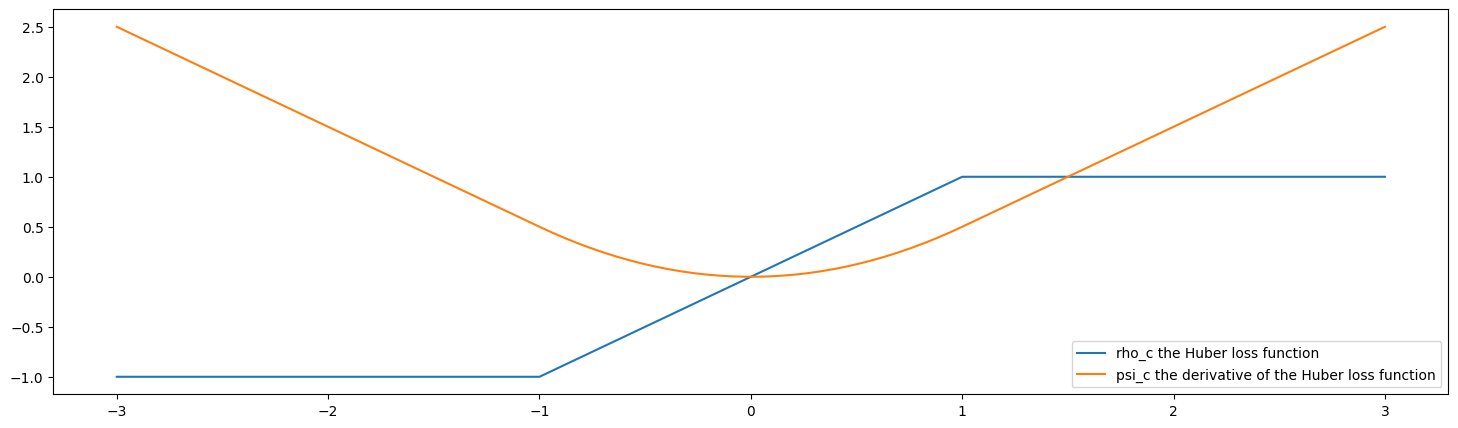

In [5]:
# Here's an example of rho and psi
import numpy as np; import matplotlib.pyplot as plt

@np.vectorize
def huber_loss(t,c):
  if np.abs(t)<=c:
    return t**2/2
  return c*np.abs(t)-c**2/2

@np.vectorize
def huber_slope(t,c):
  if t>c:
    return c
  elif t<-c:
    return -c
  else:
    return t

t = np.linspace(-3.,3.,100); plt.figure(figsize=(18,5)); plt.plot(t, huber_slope(t,1.), label="rho_c the Huber loss function"); plt.plot(t, huber_loss(t,1.), label="psi_c the derivative of the Huber loss function"); plt.legend();


<a name="cell-opt-fx-quasi"></a>

## 8.4 Quasi-Likelihood ([Return to TOC](#cell-TOC-opt)) 

---

***Generalized linear models*** such as ***logistic regression*** and ***poisson regression*** parameterize specific ***log likelihood*** forms  

$$\text{with parameters } \quad \text{E}[y_i|x_i] = \mu_i = \phi^{-1}(\theta_i = x_i^T \beta) \quad \text{ and } \quad \text{Var}[y_i|x_i] = V(\mu_i)$$


- but $\beta$ can be estimated implicitly (without explicit ***log likelihood***) through ***quasi-likehood*** $q(x|\mu)$  

$$\text{via the differential equation } \quad \frac{d}{d\mu_i} q(x|\mu_i) = \frac{y_i-\mu_i}{V(\mu_i)} \quad \text{ because then}$$

$$\nabla_{\beta} q(x|\mu_i) = \frac{d}{d\mu_i} q(x|\mu_i) \times \!\!\!\! \underbrace{\frac{d}{d\theta} \phi^{-1}(\theta_i)}_{\text{derivative of inverse}} \!\!\!\! \times \nabla_{\beta} x_i^T \beta = \frac{y_i-\mu_i}{V(\mu_i)} 
\left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{-1} x_i$$

and subsequently the ***Fisher information*** of $\beta$ for observation $i$ is

$$\mathcal{I}_i(\beta) = \text{E}_Y[\nabla_{\beta} q(x|\mu_i) \nabla_{\beta} q(x|\mu_i)^T] =\frac{\text{E}_Y[(y_i-\mu_i)^2] x_ix_i^T}{V(\mu_i)^2 \left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{2}} =  \frac{x_ix_i^T}{V(\mu_i)\left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{2}}$$


## 8.4 Quasi-Likelihood 

---


The ***Fisher scoring*** alternative to ***Newton's method*** to optimize the parameters $\beta$ is

$$\beta^{(t+1)} = \beta^{(t)} + \mathcal{I}_i(\beta)^{-1}\nabla_{\beta} q(x|\mu_i)$$

Setting $W$ as the diagonal matrix with $\quad W_{ii}=\frac{1}{V(\mu_i)\left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{2}}$ 

the ***Fisher scoring*** update can be generalized to the complete sample

\begin{align*}
\beta^{(t+1)} & = {} \beta^{(t)} + (\underbrace{X^TWX}_{\mathcal{I}(\beta)})^{-1}  X^TW \left( \phi'(\mu) \odot(y-\mu) \right)\\
& = {} (X^TWX)^{-1}  X^TW \underbrace{\left(X\beta^{(t)} + \phi'(\mu) \odot(y-\mu) \right)}_{\tilde y}
\end{align*}

where $\mu = \phi^{-1}(X \beta)$ and $\odot$ indicates elementwise multiplication 

and this shows that (once again) $\beta^{*}$ is found as a sequence of ***iteratively reweighted least squares*** problems 